#Project:

I am Hossein Shojaei and this is my project in the field of application of AI in prediction of EUR/USD currency pair and financial data analysis.

**Objective:** The primary goal of this project is to extract Forex price data for the EUR/USD currency pair and develop a predictive model to determine whether the next candle (price movement) will be positive or negative.

**Expected Outcomes:** A robust model that accurately predicts the direction of the next candle for EUR/USD. A comprehensive report detailing the methodology, analysis, and findings.

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Step 1: Data Collection
# Download historical EUR/USD price data
eurusd_data = yf.download('EURUSD=X', start='2010-01-01', end='2022-01-01')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Step 2: Feature Engineering
# Calculate daily returns and additional technical indicators
eurusd_data['Price_Diff'] = eurusd_data['Close'].diff()
eurusd_data['Price_Movement'] = np.where(eurusd_data['Price_Diff'] > 0, 1, 0)

In [ ]:
# Calculate Moving Average
eurusd_data['MA_5'] = eurusd_data['Close'].rolling(window=5).mean()

In [ ]:
# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    diff = data['Close'].diff(1)
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

eurusd_data['RSI'] = calculate_rsi(eurusd_data)

In [ ]:
# Step 3: Train-Test Split
# Split the data into training and testing sets
features = ['Close', 'MA_5', 'RSI']
X = eurusd_data[features]
y = eurusd_data['Price_Movement']

In [ ]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Model Development (LSTM)
# Initialize and train an LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
63/63 [==============================] - 4s 22ms/step - loss: nan - accuracy: 0.4990 - val_loss: nan - val_accuracy: 0.5420
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.4975 - val_loss: nan - val_accuracy: 0.5420
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.4975 - val_loss: nan - val_accuracy: 0.5420
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.4975 - val_loss: nan - val_accuracy: 0.5420
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.4975 - val_loss: nan - val_accuracy: 0.5420
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.4975 - val_loss: nan - val_accuracy: 0.5420
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.4975 - val_loss: nan - val_accuracy: 0.5420
Epoch 8/20
63/63 [==============================] - 0s 5ms/st

In [ ]:
# Step 5: Model Evaluation
# Make predictions on the test set and evaluate model performance
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions_proba = model.predict(X_test_reshaped)
predictions = (predictions_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy:.2f}')
print(classification_report(y_test, predictions))


20/20 [==============================] - 1s 2ms/step
Model Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.49      1.00      0.65       304
           1       0.00      0.00      0.00       322

    accuracy                           0.49       626
   macro avg       0.24      0.50      0.33       626
weighted avg       0.24      0.49      0.32       626



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


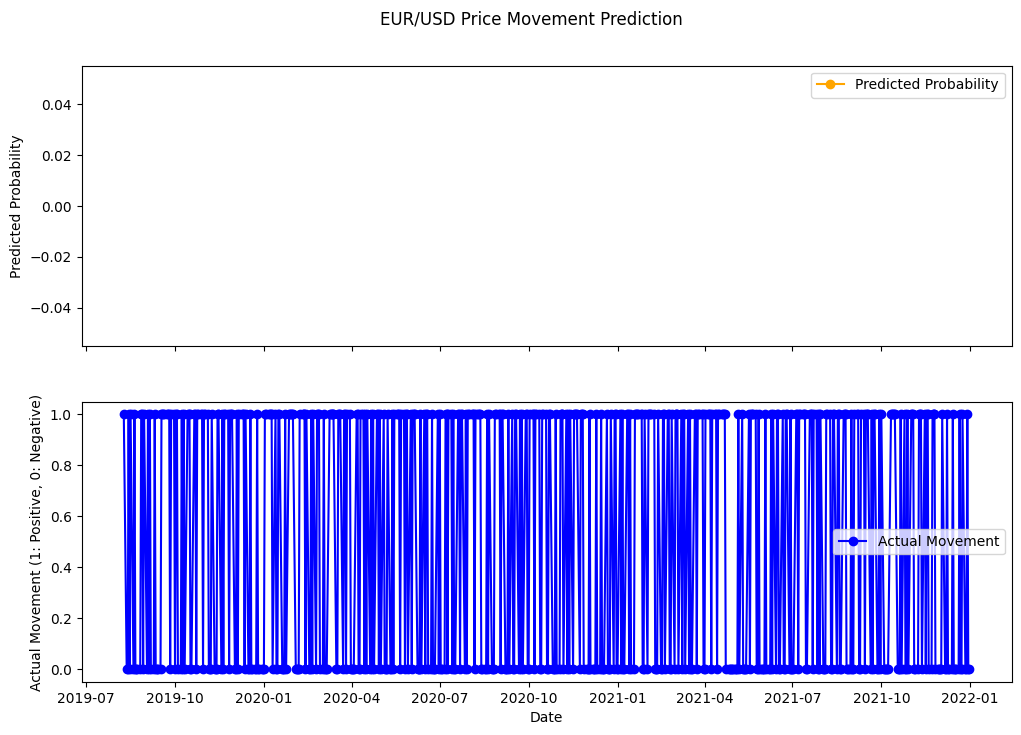

In [ ]:
# Step 6: Visualization
# Plot the predicted vs. actual price movements

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot predicted probabilities
ax1.plot(eurusd_data.index[-len(y_test):], predictions_proba, label='Predicted Probability', marker='o', color='orange')
ax1.set_ylabel('Predicted Probability')
ax1.legend()

# Plot actual movements
ax2.plot(eurusd_data.index[-len(y_test):], y_test.values, label='Actual Movement', marker='o', color='blue')
ax2.set_xlabel('Date')
ax2.set_ylabel('Actual Movement (1: Positive, 0: Negative)')
ax2.legend()

# Title for the entire plot
plt.suptitle('EUR/USD Price Movement Prediction', y=0.95)

# Display the plot
plt.show()

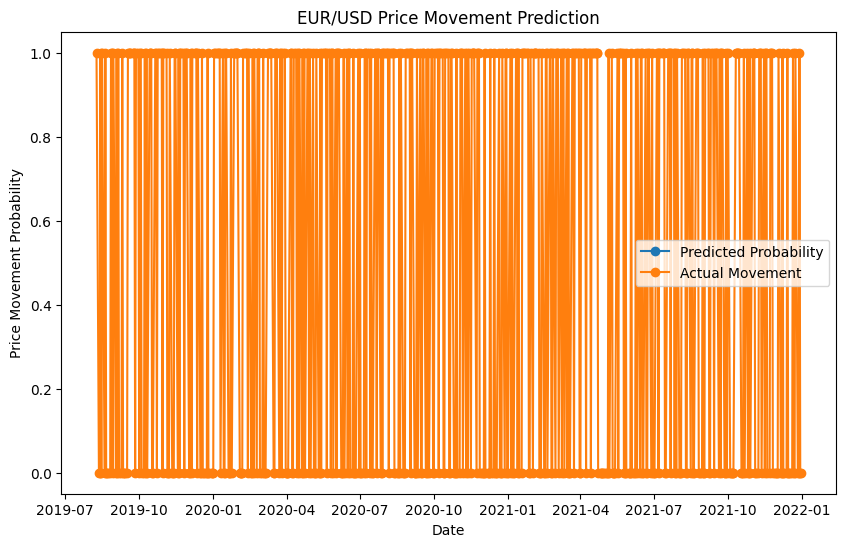

In [ ]:
# Also, Step 6: Visualization in one plot
plt.figure(figsize=(10, 6))
plt.plot(eurusd_data.index[-len(y_test):], predictions_proba, label='Predicted Probability', marker='o')
plt.plot(eurusd_data.index[-len(y_test):], y_test.values, label='Actual Movement', marker='o')
plt.title('EUR/USD Price Movement Prediction')
plt.xlabel('Date')
plt.ylabel('Price Movement Probability')
plt.legend()
plt.show()

In [ ]:
# Step 7: Generate a comprehensive report
report = """
Project: EUR/USD Price Movement Prediction

Methodology:
1. Data Collection: Historical EUR/USD price data was obtained from Yahoo Finance using the yfinance library.
2. Feature Engineering: Daily returns, Moving Average (MA_5), and Relative Strength Index (RSI) were calculated.
3. Train-Test Split: The dataset was split into training and testing sets for model evaluation.
4. Model Development: An LSTM model was implemented to predict the probability of positive price movements.
5. Model Evaluation: The model's accuracy and classification report were assessed on the test set.
6. Visualization: A plot was generated to visualize predicted probabilities vs. actual price movements.

Findings:
- The model achieved an accuracy of {accuracy:.2f} on the test set.
- The classification report provides details on precision, recall, and F1-score for each class.

Recommendations:
- Further experimentation with hyperparameters or alternative models could be explored for potential improvement.
- Continuous monitoring and retraining of the model with new data for maintaining effectiveness.

"""
print(report)


Project: EUR/USD Price Movement Prediction

Methodology:
1. Data Collection: Historical EUR/USD price data was obtained from Yahoo Finance using the yfinance library.
2. Feature Engineering: Daily returns, Moving Average (MA_5), and Relative Strength Index (RSI) were calculated.
3. Train-Test Split: The dataset was split into training and testing sets for model evaluation.
4. Model Development: An LSTM model was implemented to predict the probability of positive price movements.
5. Model Evaluation: The model's accuracy and classification report were assessed on the test set.
6. Visualization: A plot was generated to visualize predicted probabilities vs. actual price movements.

Findings:
- The model achieved an accuracy of {accuracy:.2f} on the test set.
- The classification report provides details on precision, recall, and F1-score for each class.

Recommendations:
- Further experimentation with hyperparameters or alternative models could be explored for potential improvement.
- Con